# Robot failure

### Each robot records time series from six different sensors. For each sample denoted by a different id we are going to classify if the robot reports a failure or not. From a machine learning point of view, our goal is to classify each group of time series.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

/home/andres/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/andres/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### The first column is the DataFrame index and has no meaning here. There re six different time series (a-f) for the different sensors. The different robots are denoted by the ids column.

In [2]:
#Data from the sensors

timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


### On the other hand, y contains the information which robot id reported a failure and which not:

In [3]:
# y  contains the information which robot id reported a failure and which not:

y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

### In the following we illustrate the time series of the sample id 3 reporting no failure:

In [4]:
selected_ID = 20

for tripID in set(timeseries['id'].values):
        df_ID = timeseries[timeseries['id'] == selected_ID]

In [5]:
# Get data for individual ID
# Selected_trip : Id of a particular trip


def select_ID(df,selected_ID):
    for tripID in set(timeseries['id'].values):
        df_ID = timeseries[timeseries['id'] == selected_ID]




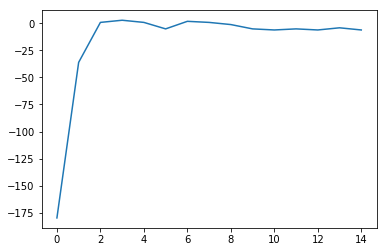

In [6]:
select_ID(timeseries,1)
plt.plot(df_ID['time'],df_ID['T_x'])
plt.show() 



#### For extracting all features, we do:


Details in : http://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html


In [7]:
extraction_settings = ComprehensiveFCParameters()

In [8]:
from tsfresh import extract_features

X = extract_features(timeseries, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute, n_jobs= 4)

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [9]:
X.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,2.602085e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4764 entries, F_x__abs_energy to T_z__variance_larger_than_standard_deviation
dtypes: float64(4764)
memory usage: 3.2 MB


### Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [11]:
X_filtered = extract_relevant_features(timeseries, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [12]:
X_filtered.head()

variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,0.65,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,19.84,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,22.01,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,10.64,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,16.00,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000


In [13]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 623 entries, F_x__abs_energy to F_z__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4
dtypes: float64(623)
memory usage: 429.0 KB


# Train and evaluate a DecisionTreeClassifier

In [14]:
X_train, X_test, X_filtered_train, X_filtered_test,\
                            y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)

### First, test and train with the unfiltered data

In [15]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(X_train, y_train)

print(classification_report(y_test, DecisionTree.predict(X_test)))

             precision    recall  f1-score   support

      False       1.00      0.96      0.98        28
       True       0.89      1.00      0.94         8

avg / total       0.98      0.97      0.97        36



In [16]:
DecisionTree.n_features_

4764

### Now, train with the filtered data

In [17]:
DecisionTree2 = DecisionTreeClassifier()

DecisionTree2.fit(X_filtered_train, y_train)

print(classification_report(y_test, DecisionTree2.predict(X_filtered_test)))

             precision    recall  f1-score   support

      False       1.00      0.96      0.98        28
       True       0.89      1.00      0.94         8

avg / total       0.98      0.97      0.97        36



## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix


y_predicted = DecisionTree2.predict(X_filtered)



In [19]:
confusion_matrix(y, y_predicted)

array([[66,  1],
       [ 0, 21]])

In [20]:
pd.crosstab(y, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,66,1,67
True,0,21,21
All,66,22,88


###  The diagonal elements show the number of correct classifications for each class

### The off-diagonal elements provides the misclassifications

### The total number of classifications for each class in both y_true and y_pred, from the "All" subtotals


# Train and evaluate a RandomForestRegressor 

In [21]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard	deviation:",scores.std())

In [22]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_reg.fit(X_filtered_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
forest_scores = cross_val_score(forest_reg, X_filtered_train, y_train, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


Scores: [0.04082483 0.13540064 0.13416408 0.37947332 0.10954451 0.14142136
 0.18973666 0.         0.10954451 0.08944272]
Mean: 0.13295526249433154
Standard	deviation: 0.0965551561288334


## Perform a from GridSearchCV


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3,	10], 'max_features': [2, 3, 4]},
 ]


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')



In [25]:
grid_search.fit(X_filtered_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'bootstrap': [False], 'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [26]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [27]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [28]:
cvres = grid_search.cv_results_


In [29]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),	params)


0.2573699987164709 {'max_features': 2, 'n_estimators': 3}
0.20238957102958266 {'max_features': 2, 'n_estimators': 10}
0.17908838480663555 {'max_features': 2, 'n_estimators': 30}
0.26953584668754665 {'max_features': 4, 'n_estimators': 3}
0.17813132579860633 {'max_features': 4, 'n_estimators': 10}
0.1989287550170904 {'max_features': 4, 'n_estimators': 30}
0.21681454519599697 {'max_features': 6, 'n_estimators': 3}
0.18081014266989476 {'max_features': 6, 'n_estimators': 10}
0.15682479744612168 {'max_features': 6, 'n_estimators': 30}
0.21182963643408084 {'max_features': 8, 'n_estimators': 3}
0.18449515315709936 {'max_features': 8, 'n_estimators': 10}
0.18033681687710781 {'max_features': 8, 'n_estimators': 30}
0.19611613513818404 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.16466749714313575 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.1905906249656219 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.20708600963033547 {'bootstrap': False, 'max_fea

In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09047619, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08222222, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06862745, 0.064     ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07111111, 0.        , 0.        ,
       0.        , 0.00315582, 0.        , 0.        , 0.     

In [31]:
### Predict for the whole dataset and 

In [32]:
y_predicted_forest = DecisionTree2.predict(X_filtered_test)


pd.crosstab(y_test, y_predicted_forest, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,27,1,28
True,0,8,8
All,27,9,36
